In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mth
import matplotlib.patches as patches
from scipy import stats as st
from plotly.offline import init_notebook_mode, iplot
import plotly
from collections import Counter

In [2]:
plt.rcParams.update({'figure.max_open_warning': 0})
df = pd.read_csv('anime_data.csv')

In [3]:
df.head()

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV
3,10003,2008-01-01T00:00:00+00:00,NaN,2 min per ep,15,"['Comedy', 'Dementia', 'Horror', 'Seinen']",6848,NaN,10146.0,R+ - Mild Nudity,5.05,1181,Original,Finished Airing,[],"In these jokey short films, many of them crude...",Kago Shintarou Anime Sakuhin Shuu,NaN,OVA
4,10005,2007-03-31T00:00:00+00:00,NaN,1 hr 35 min,1,"['Action', 'Adventure', 'Mecha', 'Sci-Fi']",10765,NaN,6121.0,G - All Ages,6.43,228,Unknown,Finished Airing,"[{'mal_id': 455, 'name': 'Palm Studio'}]",This theatrical version based on the manga by ...,Tetsujin 28-gou: Hakuchuu no Zangetsu,NaN,Movie


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11335 entries, 0 to 11334
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         11335 non-null  int64  
 1   aired_from     11330 non-null  object 
 2   aired_to       5967 non-null   object 
 3   duration       11335 non-null  object 
 4   episodes       11335 non-null  int64  
 5   genres         11335 non-null  object 
 6   popularity     11335 non-null  int64  
 7   premiered      3455 non-null   object 
 8   rank           10053 non-null  float64
 9   rating         11335 non-null  object 
 10  score          11335 non-null  float64
 11  scored_by      11335 non-null  int64  
 12  source         11335 non-null  object 
 13  status         11335 non-null  object 
 14  studios        11335 non-null  object 
 15  synopsis       11098 non-null  object 
 16  title          11335 non-null  object 
 17  title_english  5394 non-null   object 
 18  type  

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mal_id,11335.0,16507.488928,14050.968996,1.00,3310.50,10906.00,31613.50,42723.00
episodes,11335.0,10.719894,37.196154,1.00,1.00,2.00,12.00,1818.00
popularity,11335.0,6026.067314,3650.599146,1.00,2916.00,5860.00,8924.50,14659.00
rank,10053.0,5222.290162,3081.816589,1.00,2544.00,5142.00,7905.00,10621.00
score,11335.0,6.546585,0.890211,1.86,5.96,6.57,7.18,9.22
scored_by,11335.0,23079.383414,76207.802279,100.00,547.00,2102.00,11886.50,1524129.00


In [6]:
df.isna().sum()

mal_id              0
aired_from          5
aired_to         5368
duration            0
episodes            0
genres              0
popularity          0
premiered        7880
rank             1282
rating              0
score               0
scored_by           0
source              0
status              0
studios             0
synopsis          237
title               0
title_english    5941
type                0
dtype: int64

In [7]:
df.columns

Index(['mal_id', 'aired_from', 'aired_to', 'duration', 'episodes', 'genres',
       'popularity', 'premiered', 'rank', 'rating', 'score', 'scored_by',
       'source', 'status', 'studios', 'synopsis', 'title', 'title_english',
       'type'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
def miss_str(data):
    miss_num = data.isnull().sum()
    miss_num_percent = 100 * miss_num / len(data)
    miss_val = pd.concat([miss_num, miss_num_percent], axis = 1)
    miss_val_ren_columns = miss_val.rename(
    columns = {0 : 'Missing values', 1 : '% of Total'})
    miss_val_ren_columns = miss_val_ren_columns[
        miss_val_ren_columns.iloc[:,1] != 0].sort_values('% of Total', ascending = False).round(1)
    return miss_val_ren_columns

In [10]:
missing_df = miss_str(df)
missing_df.head(10)

,Missing values,% of Total
premiered,7880,69.5
title_english,5941,52.4
aired_to,5368,47.4
rank,1282,11.3
synopsis,237,2.1
aired_from,5,0.0


In [11]:
df = df.dropna()

In [12]:
df.isna().sum()

mal_id           0
aired_from       0
aired_to         0
duration         0
episodes         0
genres           0
popularity       0
premiered        0
rank             0
rating           0
score            0
scored_by        0
source           0
status           0
studios          0
synopsis         0
title            0
title_english    0
type             0
dtype: int64

In [13]:
int_types = ['uint8', 'int8', 'int16']
for i in int_types:
    print(np.iinfo(i))

Machine parameters for uint8
---------------------------------------------------------------
min = 0
max = 255
---------------------------------------------------------------

Machine parameters for int8
---------------------------------------------------------------
min = -128
max = 127
---------------------------------------------------------------

Machine parameters for int16
---------------------------------------------------------------
min = -32768
max = 32767
---------------------------------------------------------------



In [14]:
df.info(memory_usage = 'deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         2384 non-null   int64  
 1   aired_from     2384 non-null   object 
 2   aired_to       2384 non-null   object 
 3   duration       2384 non-null   object 
 4   episodes       2384 non-null   int64  
 5   genres         2384 non-null   object 
 6   popularity     2384 non-null   int64  
 7   premiered      2384 non-null   object 
 8   rank           2384 non-null   float64
 9   rating         2384 non-null   object 
 10  score          2384 non-null   float64
 11  scored_by      2384 non-null   int64  
 12  source         2384 non-null   object 
 13  status         2384 non-null   object 
 14  studios        2384 non-null   object 
 15  synopsis       2384 non-null   object 
 16  title          2384 non-null   object 
 17  title_english  2384 non-null   object 
 18  type   

In [15]:
for dtype in ['float', 'int', 'object']:
    selected_dtype = df.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024
    print('Average memory usage for {} columns {:03.3f} KB'.format(dtype, mean_usage_mb))

Average memory usage for float columns 18.625 KB
Average memory usage for int columns 18.625 KB
Average memory usage for object columns 338.028 KB


In [16]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj, pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep = True).sum()
    else:
        usage_b = pandas_obj.memory_usage(deep = True)
    usage_mb = usage_b / 1024
    return '{:03.3f} KB'.format(usage_mb)

In [17]:
df_int = df.select_dtypes(include=['int'])
converted_int = df_int.apply(pd.to_numeric, downcast='unsigned')
print(mem_usage(df_int), mem_usage(converted_int))

compare_ints = pd.concat([df_int.dtypes, converted_int.dtypes], axis = 1)
compare_ints.columns = ['before', 'after']
compare_ints.apply(pd.Series.value_counts)

93.125 KB 41.906 KB


,before,after
uint16,NaN,3.0
uint32,NaN,1.0
int64,4.0,NaN


In [18]:
df_float = df.select_dtypes(include=['float'])
converted_float = df_float.apply(pd.to_numeric, downcast='float')

print(mem_usage(df_float), mem_usage(converted_float))

compare_float = pd.concat([df_float.dtypes, converted_float.dtypes], axis = 1)
compare_float.columns = ['before', 'after']
compare_float.apply(pd.Series.value_counts)

55.875 KB 37.250 KB


,before,after
float32,NaN,2.0
float64,2.0,NaN


In [19]:
optimized_df = df.copy()

optimized_df[converted_int.columns] = converted_int
optimized_df[converted_float.columns] = converted_float

print(mem_usage(df), mem_usage(optimized_df))

4844.140 KB 4774.296 KB


In [20]:
df_obj = df.select_dtypes(include=['object']).copy()
df_obj.describe().T

,count,unique,top,freq
aired_from,2384,1268,2014-04-06T00:00:00+00:00,12
aired_to,2384,1436,2016-09-24T00:00:00+00:00,9
duration,2384,33,24 min per ep,1053
genres,2384,1634,"['Slice of Life', 'Comedy']",28
premiered,2384,194,Fall 2016,62
rating,2384,6,PG-13 - Teens 13 or older,1443
source,2384,15,Manga,898
status,2384,2,Finished Airing,2383
studios,2384,363,"[{'mal_id': 7, 'name': 'J.C.Staff'}]",105
synopsis,2384,2380,"Small for his age, Yukinari has been bullied a...",2


In [21]:
converted_obj = pd.DataFrame()
for col in df_obj.columns:
    num_unique_values = len(df_obj[col].unique())
    num_total_values = len(df_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = df_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = df_obj[col]

In [22]:
print(mem_usage(df_obj), mem_usage(converted_obj))

compare_obj = pd.concat([df_obj.dtypes,converted_obj.dtypes], axis = 1)
compare_obj.columns = ['before', 'after']
compare_obj.apply(pd.Series.value_counts)

5435.593 KB 4339.920 KB


,before,after
object,13.0,6
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1
category,NaN,1


In [23]:
optimized_df[converted_obj.columns] = converted_obj
mem_usage(optimized_df)

'4381.826 KB'

In [24]:
# df = optimized_df

In [25]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2384 entries, 0 to 11329
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mal_id         2384 non-null   int64  
 1   aired_from     2384 non-null   object 
 2   aired_to       2384 non-null   object 
 3   duration       2384 non-null   object 
 4   episodes       2384 non-null   int64  
 5   genres         2384 non-null   object 
 6   popularity     2384 non-null   int64  
 7   premiered      2384 non-null   object 
 8   rank           2384 non-null   float64
 9   rating         2384 non-null   object 
 10  score          2384 non-null   float64
 11  scored_by      2384 non-null   int64  
 12  source         2384 non-null   object 
 13  status         2384 non-null   object 
 14  studios        2384 non-null   object 
 15  synopsis       2384 non-null   object 
 16  title          2384 non-null   object 
 17  title_english  2384 non-null   object 
 18  type   

In [26]:
df.sample(10)

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type
6417,3467,2008-07-03T00:00:00+00:00,2008-09-25T00:00:00+00:00,25 min per ep,12,"['Comedy', 'Romance']",1165,Summer 2008,2536.0,PG-13 - Teens 13 or older,7.25,57591,Light novel,Finished Airing,"[{'mal_id': 51, 'name': 'Diomedea'}]",Hakujo Academy is a private high school with a...,Nogizaka Haruka no Himitsu,Haruka Nogizaka's Secret,TV
9143,490,2005-07-04T00:00:00+00:00,2005-12-26T00:00:00+00:00,24 min per ep,26,"['Comedy', 'Parody', 'School']",2049,Summer 2005,1674.0,PG-13 - Teens 13 or older,7.46,17096,Manga,Finished Airing,"[{'mal_id': 44, 'name': 'Shaft'}]",The 11-year-old Miyamoto Rebecca becomes the n...,Paniponi Dash!,Pani Poni Dash!,TV
8973,4581,2008-10-02T00:00:00+00:00,2008-12-25T00:00:00+00:00,24 min per ep,13,"['Action', 'Horror', 'Supernatural', 'Shounen']",1274,Fall 2008,2485.0,R - 17+ (violence & profanity),7.26,37589,Manga,Finished Airing,"[{'mal_id': 6, 'name': 'Gainax'}, {'mal_id': 9...",After being brutally murdered along with her f...,Shikabane Hime: Aka,Corpse Princess: Aka,TV
7770,38084,2019-10-05T00:00:00+00:00,2020-03-21T00:00:00+00:00,23 min per ep,21,"['Action', 'Supernatural', 'Magic', 'Fantasy']",996,Fall 2019,552.0,PG-13 - Teens 13 or older,7.98,51192,Game,Finished Airing,"[{'mal_id': 1835, 'name': 'CloverWorks'}]","A.D. 2016, the foundations of humanity have be...",Fate/Grand Order: Zettai Majuu Sensen Babylonia,Fate/Grand Order: Absolute Demonic Front - Bab...,TV
2708,209,2003-09-01T00:00:00+00:00,2004-03-16T00:00:00+00:00,25 min per ep,26,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'S...",1859,Fall 2003,1379.0,PG-13 - Teens 13 or older,7.56,24509,Light novel,Finished Airing,"[{'mal_id': 7, 'name': 'J.C.Staff'}]","Anita King, Maggie Mui, and Michelle Cheung ar...",R.O.D: The TV,R.O.D -The TV-,TV
5849,33203,2017-04-11T00:00:00+00:00,2017-06-27T00:00:00+00:00,23 min per ep,12,"['Music', 'Drama', 'Romance', 'School', 'Shoujo']",1538,Spring 2017,3463.0,PG-13 - Teens 13 or older,7.03,30688,Manga,Finished Airing,"[{'mal_id': 112, 'name': ""Brain's Base""}]","Every day, a young girl wearing a mask stands ...",Fukumenkei Noise,Anonymous Noise,TV
9049,4722,2008-10-06T00:00:00+00:00,2009-03-30T00:00:00+00:00,24 min per ep,25,"['Comedy', 'Drama', 'Romance', 'Shoujo']",620,Fall 2008,355.0,PG-13 - Teens 13 or older,8.15,110187,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Bright, diligent, and yet naïve 16-year-old Ky...",Skip Beat!,Skip Beat!,TV
1075,13367,2012-07-06T00:00:00+00:00,2012-09-28T00:00:00+00:00,24 min per ep,12,"['Comedy', 'Ecchi', 'Harem', 'Mystery', 'Roman...",810,Summer 2012,5121.0,R+ - Mild Nudity,6.64,78325,Light novel,Finished Airing,"[{'mal_id': 418, 'name': 'Studio Gokumi'}]","Shougo Mikadono's father has just passed away,...","Kono Naka ni Hitori, Imouto ga Iru!",NAKAIMO - My Little Sister Is Among Them!,TV
10237,7088,2010-04-03T00:00:00+00:00,2010-06-19T00:00:00+00:00,23 min per ep,12,"['Action', 'Harem', 'Comedy', 'Magic', 'Ecchi'...",308,Spring 2010,3808.0,R+ - Mild Nudity,6.94,216393,Light novel,Finished Airing,"[{'mal_id': 8, 'name': 'Artland'}]","Dreaming of changing the world for good, Akuto...",Ichiban Ushiro no Daimaou,Demon King Daimao,TV
4192,28171,2015-04-04T00:00:00+00:00,2015-09-26T00:00:00+00:00,25 min per ep,24,"['Ecchi', 'School', 'Shounen']",51,Spring 2015,182.0,PG-13 - Teens 13 or older,8.35,597866,Manga,Finished Airing,"[{'mal_id': 7, 'name': 'J.C.Staff'}]","Ever since he was a child, fifteen-year-old So...",Shokugeki no Souma,Food Wars! Shokugeki no Soma,TV


In [27]:
df['score_sum'] = round(df['score'] * df['scored_by'])

In [28]:
df.head()

,mal_id,aired_from,aired_to,duration,episodes,genres,popularity,premiered,rank,rating,score,scored_by,source,status,studios,synopsis,title,title_english,type,score_sum
0,1,1998-04-03T00:00:00+00:00,1999-04-24T00:00:00+00:00,24 min per ep,26,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...",38,Spring 1998,27.0,R - 17+ (violence & profanity),8.79,544987,Original,Finished Airing,"[{'mal_id': 14, 'name': 'Sunrise'}]","In the year 2071, humanity has colonized sever...",Cowboy Bebop,Cowboy Bebop,TV,4790436.0
1,100,2001-04-04T00:00:00+00:00,2001-06-27T00:00:00+00:00,23 min per ep,13,"['Comedy', 'Drama', 'Fantasy', 'Magic', 'Roman...",2075,Spring 2001,2703.0,PG-13 - Teens 13 or older,7.21,23787,Manga,Finished Airing,"[{'mal_id': 34, 'name': 'Hal Film Maker'}]","Due to her father's remarriage, robust 16-year...",Shin Shirayuki-hime Densetsu Prétear,Prétear: The New Legend of Snow White,TV,171504.0
2,1000,1978-03-14T00:00:00+00:00,1979-02-13T00:00:00+00:00,25 min per ep,42,"['Action', 'Sci-Fi', 'Adventure', 'Space', 'Dr...",2980,Spring 1978,1008.0,PG-13 - Teens 13 or older,7.71,7059,Manga,Finished Airing,"[{'mal_id': 18, 'name': 'Toei Animation'}]",It is 2977 AD and mankind has become stagnant....,Uchuu Kaizoku Captain Herlock,Space Pirate Captain Harlock,TV,54425.0
8,10015,2011-04-11T00:00:00+00:00,2012-09-24T00:00:00+00:00,24 min per ep,73,"['Action', 'Fantasy', 'Game', 'Shounen']",2167,Spring 2011,6482.0,PG-13 - Teens 13 or older,6.35,23161,Manga,Finished Airing,"[{'mal_id': 36, 'name': 'Gallop'}]",Yu☆Gi☆Oh! Zexal follows the adventures of Yuum...,Yu☆Gi☆Oh! Zexal,Yu-Gi-Oh! Zexal,TV,147072.0
15,10030,2011-10-01T00:00:00+00:00,2012-03-24T00:00:00+00:00,24 min per ep,25,"['Comedy', 'Drama', 'Romance', 'Shounen']",450,Fall 2011,135.0,PG-13 - Teens 13 or older,8.41,162355,Manga,Finished Airing,"[{'mal_id': 7, 'name': 'J.C.Staff'}]","With the serialization of their new manga, ""De...",Bakuman. 2nd Season,Bakuman.,TV,1365406.0


Text(0, 0.5, 'Количество')

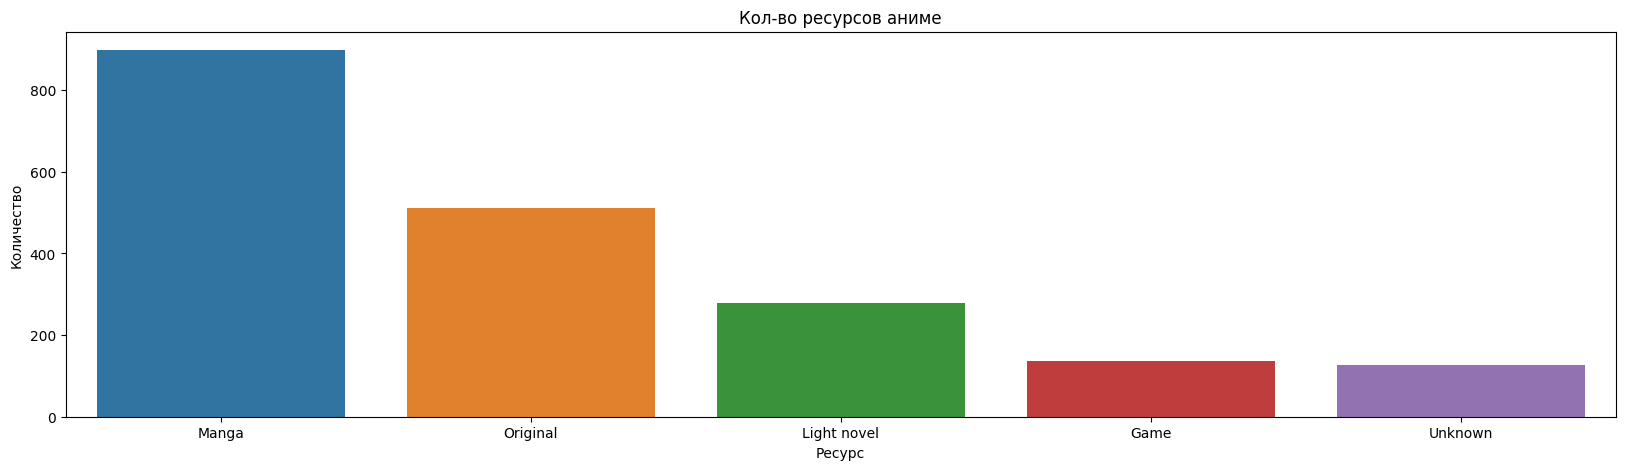

In [32]:
top_type = df.pivot_table(index='source', values='mal_id', aggfunc = 'count').sort_values(by = ['mal_id', 'source'], ascending = [False, True]).head(5)

plt.figure(figsize=(20,5))
sns.barplot(x = top_type.index, y = top_type['mal_id'])
plt.title('Кол-во ресурсов аниме')
plt.xlabel('Ресурс')
plt.ylabel('Количество')

In [33]:
df['henres'] = df['genres'].str.split(',').str.get(0)
df['henres'] = df['henres'].str.replace('[', '')
df['henres'] = df['henres'].str.replace("'", '')

C:\Users\Alex\AppData\Local\Temp\ipykernel_6448\632149664.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



Text(0, 0.5, 'Популярность')

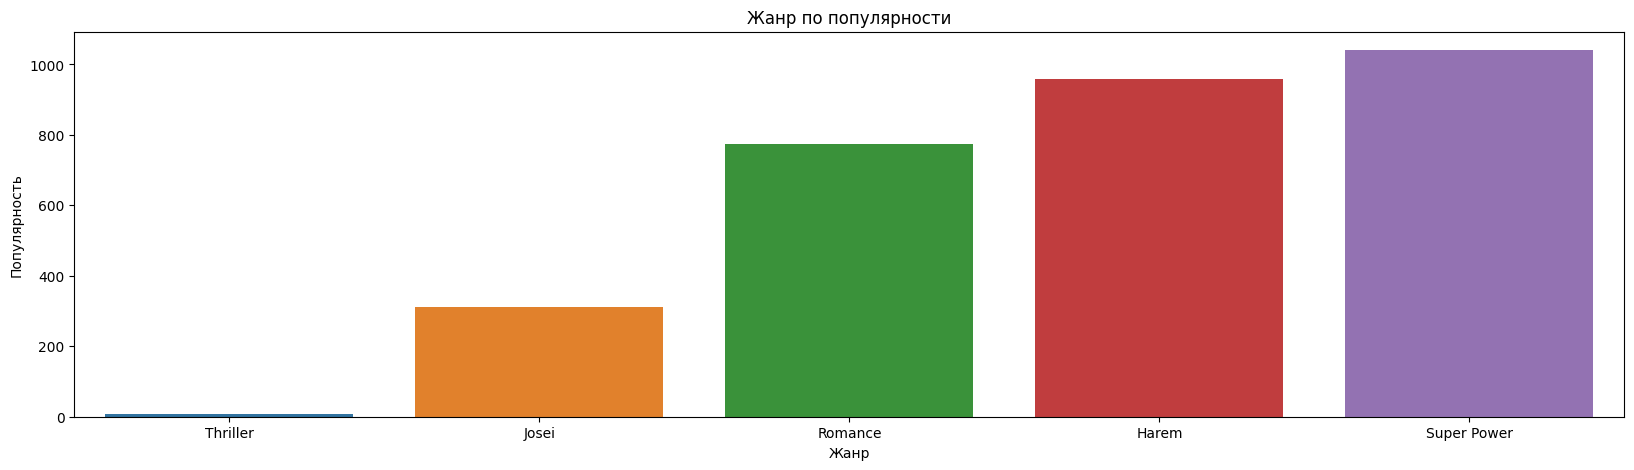

In [34]:
top_genres = df.pivot_table(index='henres', values='popularity', aggfunc='mean').sort_values(by=['popularity', 'henres']).head(5)
plt.figure(figsize=(20,5))
sns.barplot(x = top_genres.index, y = top_genres['popularity'])
plt.title('Жанр по популярности')
plt.xlabel('Жанр')
plt.ylabel('Популярность')

In [35]:
df['studios'] = df['studios'].str.split(',').str.get(1)
df['studios'] = df['studios'].str.split(':').str.get(1)
df['studios'] = df['studios'].str.split("'").str.get(1)

Text(0, 0.5, 'Количество')

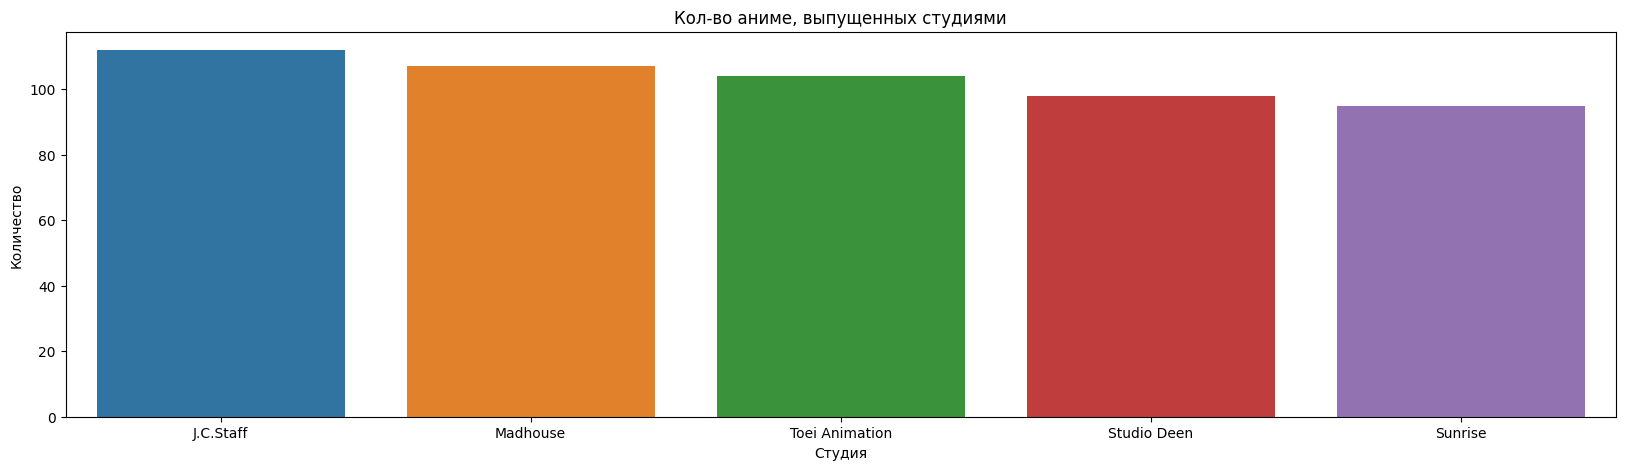

In [38]:
top_type = df.pivot_table(index='studios', values='mal_id', aggfunc = 'count').sort_values(by = ['mal_id', 'studios'], ascending = [False, True]).head(5)

plt.figure(figsize=(20,5))
sns.barplot(x = top_type.index, y = top_type['mal_id'])
plt.title('Кол-во аниме, выпущенных студиями')
plt.xlabel('Студия')
plt.ylabel('Количество')

Text(0, 0.5, 'Количество')

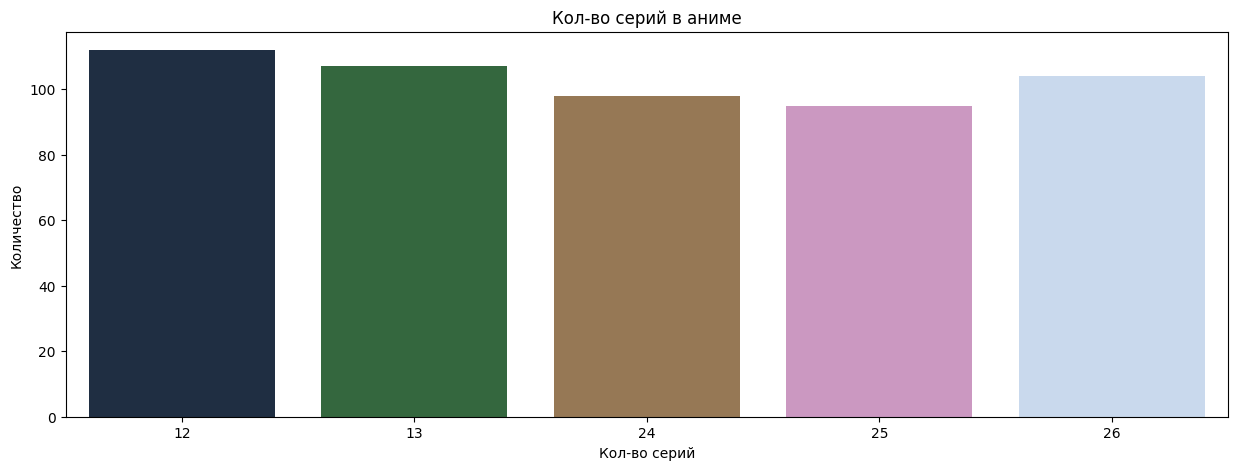

In [44]:
episodes = df.pivot_table(index='episodes', values='mal_id', aggfunc='count').sort_values(by = ['mal_id', 'episodes'], ascending = [False, True]).head(5)
plt.figure(figsize=(15,5))
sns.barplot(x = episodes.index, y = top_type['mal_id'], palette='cubehelix')
plt.title('Кол-во серий в аниме')
plt.xlabel('Кол-во серий')
plt.ylabel('Количество')

C:\Users\Alex\AppData\Local\Temp\ipykernel_6448\1856645348.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

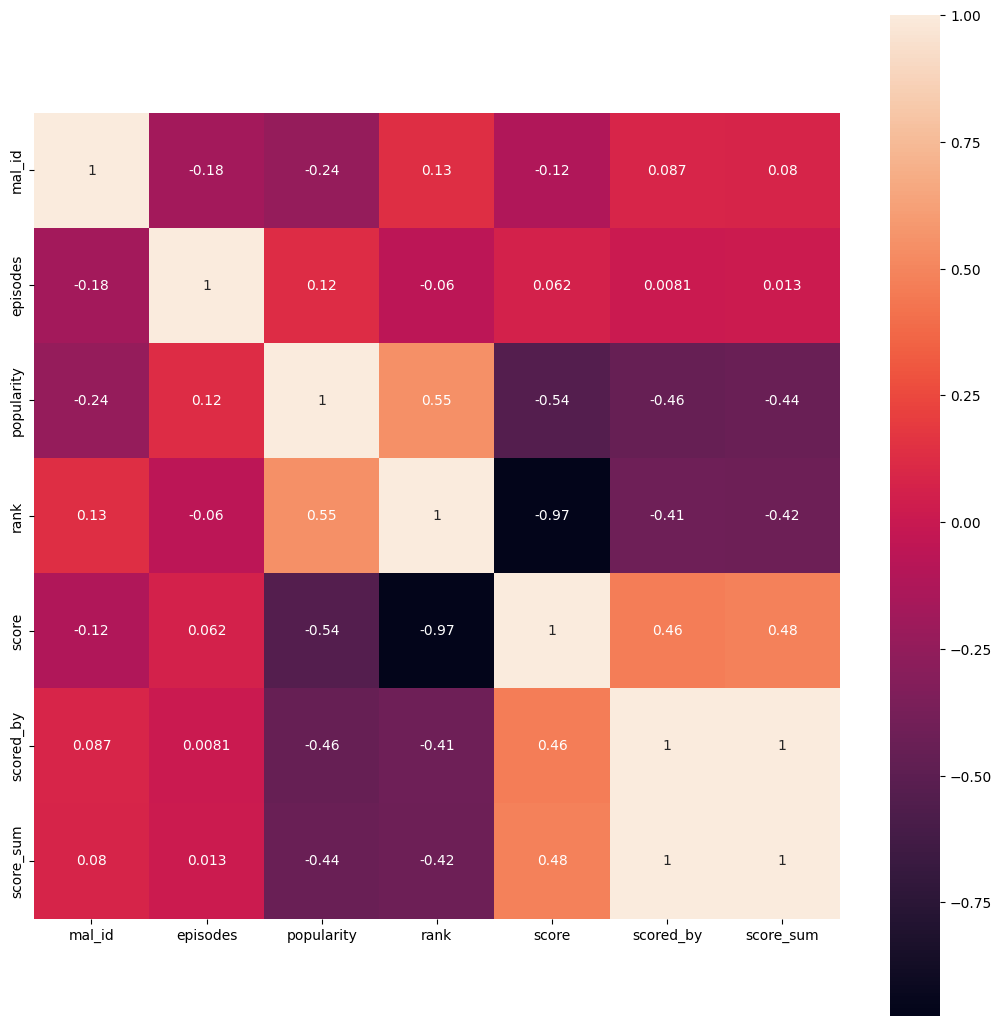

In [46]:
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(df.corr(), annot=True, fmt='.2g', square=True, ax=ax)